In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Aditya\OneDrive\Desktop\titanic_practice.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation:- null values are present in the three features sex,embarked and cabin, we also observe that cabin have more null values more than 50% so we can remove the cabin feature. 

#unwanted columns:-passengerID,name and ticket because they are constant in the nature, they're not helpful in our model prediction 



In [5]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#observation:- after removing unwanted columns, in the data set 'sex',and 'embarked' are in the form of object datatype so we have to convert them into numerical data type,
#before applying encoding techniques we have to check the data again 

In [9]:
print('no of categories in sex is \n',data['Sex'].value_counts())
print('\n')
print('no of categories in Embarked is \n',data['Embarked'].value_counts())

no of categories in sex is 
 male      577
female    314
Name: Sex, dtype: int64


no of categories in Embarked is 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


observation:- in the two features one is having two types of categories and another one is having three types of categories so we use get dummies  

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
data.dropna(subset=['Embarked'],inplace=True)

In [8]:
data.shape

(889, 8)

In [9]:
df1=pd.get_dummies((data),drop_first=True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [14]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [16]:
#in the age column iam using median to fillna 

In [10]:
df1.fillna(df1['Age'].median(),inplace=True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [18]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [19]:
df1.shape

(889, 9)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


there are only two features are continous reamining all are in the form of categorical exept target variable

In [21]:
print('categories present in class are:-',data['Pclass'].unique())
print('\n')
print('categories present in Sex are:-',data['Sex'].unique())
print('\n')
print('categories present in SibSp are:-',data['SibSp'].unique())
print('\n')
print('categories present in Parch are:-',data['Parch'].unique())
print('\n')
print('categories present in Embarked are:-',data['Embarked'].unique())


categories present in class are:- [3 1 2]


categories present in Sex are:- ['male' 'female']


categories present in SibSp are:- [1 0 3 4 2 5 8]


categories present in Parch are:- [0 1 2 5 3 4 6]


categories present in Embarked are:- ['S' 'C' 'Q']


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Pclass', ylabel='count'>

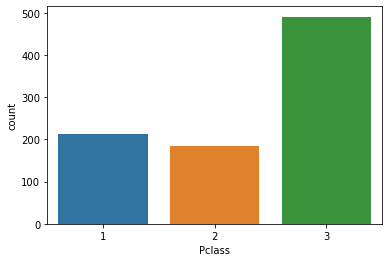

In [23]:
sns.countplot(x='Pclass',data=df1)

observation:-class 1,class 2 are accuring almost same but calss 3 is having more weight compared to class1 and class 2

1=male 
 0=female


male      577
female    312
Name: Sex, dtype: int64


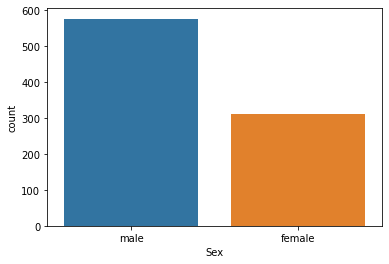

In [24]:
sns.countplot(x='Sex',data=data)
print('1=male \n 0=female')
print('\n')
print(data['Sex'].value_counts())

here 1 is male and 0 is female we observe that male counts is more than female counts 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

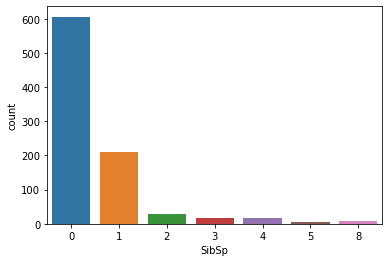

In [25]:
sns.countplot(x='SibSp',data=data)

we observe that most of the passengers are don't siblings and also sibings who have 1 is more than other categories exept 0



0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


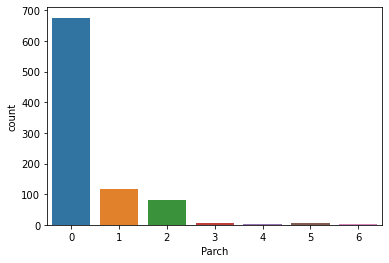

In [26]:
sns.countplot(x='Parch',data=data)
print('\n')
print(data['Parch'].value_counts())

here parch is indicates of family members in the ship so we observe that most of the passengers were travelling alone in the ship,
and some of the families are in single digit only the family has members 3 and 5 is occuring 5 times each,and 4 members is 4 times and finally highest members in the family is only one that is present only one time these observations we clearly see at the count plot plot 

0=C 
 1=Q 
 2=S


S    644
C    168
Q     77
Name: Embarked, dtype: int64




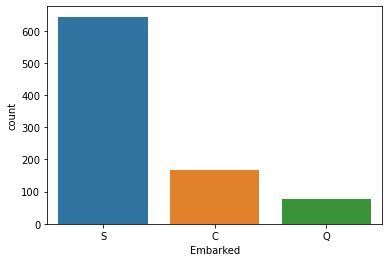

In [27]:
sns.countplot(x='Embarked',data=data)
print('0=C \n 1=Q \n 2=S')
print('\n')

print(data['Embarked'].value_counts())
print('\n')

observation:- S is occuring most
    

<AxesSubplot:xlabel='Age', ylabel='Density'>

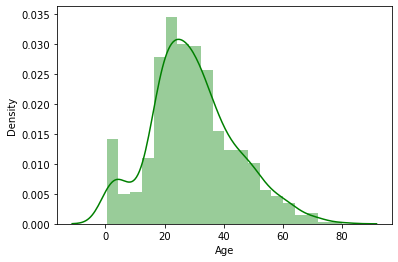

In [28]:
#lets plot the distribution of the age column 
sns.distplot(data['Age'],color='green')

observation:-from the dist plot we observe that most of the data is between 18years to 40years,most of the passengers are in the age of 18years to 40years, there are less no of passengers whos age is more than 60years   

<AxesSubplot:xlabel='Fare', ylabel='Density'>

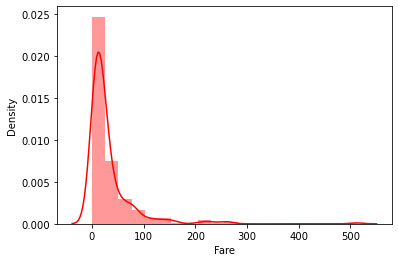

In [29]:
sns.distplot(data['Fare'],bins=20,color='red')

In [30]:
(data['Fare']>30).value_counts()

False    657
True     232
Name: Fare, dtype: int64

In [31]:
(data['Fare']>500).value_counts()

False    886
True       3
Name: Fare, dtype: int64

observation:-most of the fare is lie between 0-100 and high fare is in less numbers 

0    549
1    340
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

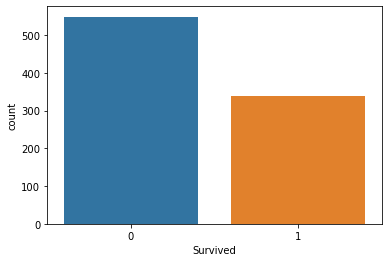

In [32]:
print(data['Survived'].value_counts())

sns.countplot(data['Survived'])

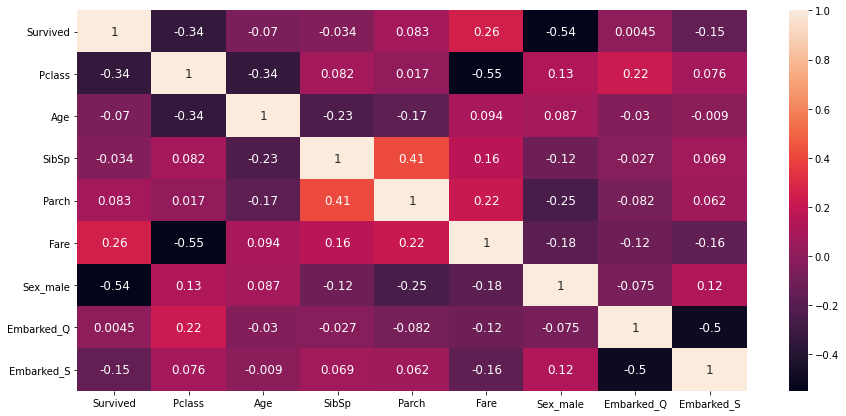

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':12})
plt.show()

In [34]:
# we can see there is negative corelation between Fare and Pclass and also sex is negatively corelated with the target variable and sisb is less corelation comparing to all 
#and also we can see there is not tightly corelation between variables 

In [35]:
df1.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [36]:
#observation:- in the age and Fare columns have some outliers the distance between 75% and max is high so we assume that there is some skewed data is prsent 
#box plot is helps us to find the outliers present in the particular features 

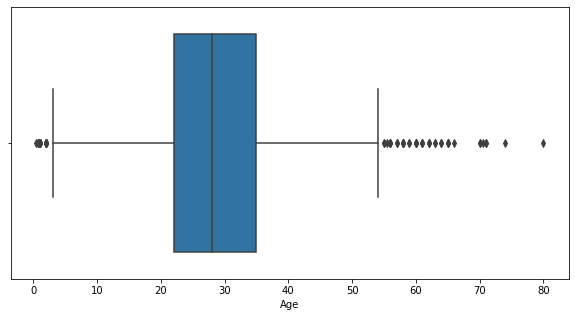

In [37]:
plt.figure(figsize=(10,5))

sns.boxplot(df1['Age'],orient="v")

plt.show()

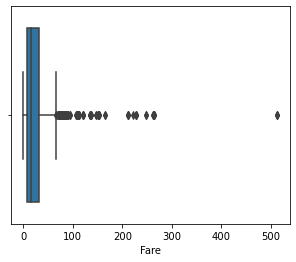

In [38]:
plt.figure(figsize=(5,4))

sns.boxplot(df1['Fare'],orient="v")

plt.show()

In [39]:
df1.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.508010
SibSp         3.691058
Parch         2.745160
Fare          4.801440
Sex_male     -0.625625
Embarked_Q    2.944406
Embarked_S   -1.006192
dtype: float64

In [40]:
#we consider skewness of Age and Fare because these two are only features have continous data reamaining all are categorical so we ignore them

In [12]:
df1['Fare'].skew()

4.801440211044194

In [13]:
df1['Age'].skew()

0.5080100783148638

In [14]:
df1.shape

(889, 9)

In [15]:
q3=data.quantile(0.75)
q1=data.quantile(0.25)

iqr=q3-q1

fare_high=q3.Fare+(1.5*iqr.Fare)
fare_high

65.6563

In [16]:
index=np.where(df1['Fare']>fare_high)
index

(array([  1,  27,  31,  34,  52,  61,  71,  87, 101, 117, 119, 123, 138,
        150, 158, 179, 194, 200, 214, 217, 223, 229, 244, 255, 256, 257,
        261, 267, 268, 274, 289, 290, 296, 298, 304, 305, 306, 309, 310,
        317, 318, 323, 324, 331, 333, 335, 336, 340, 365, 368, 372, 374,
        376, 379, 384, 389, 392, 411, 434, 437, 444, 452, 483, 485, 495,
        497, 503, 504, 519, 526, 536, 539, 543, 549, 556, 557, 580, 584,
        586, 590, 608, 626, 640, 644, 654, 658, 659, 664, 678, 680, 688,
        697, 699, 707, 715, 729, 736, 740, 741, 744, 758, 762, 764, 778,
        788, 791, 801, 819, 833, 844, 847, 854, 861, 877], dtype=int64),)

In [17]:
df1=df1.drop(df1.index[index])
df1.shape

(775, 9)

In [18]:
df1['Fare'].skew()

1.4306715336945985

In [19]:
#skewness of Fare is 1.4,IQR  giving less value comparing to zscore.

In [20]:
age_high=q3.Age+(1.5*iqr.Age)


index=np.where(df1['Age']>age_high)

df1=df1.drop(df1.index[index])
df1.shape

(768, 9)

In [21]:
age_low=q1.Age-(1.5*iqr.Age)

index=np.where(df1['Age']<age_low)

df1=df1.drop(df1.index[index])
df1.shape

(768, 9)

In [22]:
df1['Age'].skew()

0.28849930737085416

In [23]:
df1.shape

(768, 9)

In [24]:
#data loss persntage 
((889-768)/889)*100

13.610798650168729

In [25]:
#loss data is less than 20% so we can proceed furthur steps


<AxesSubplot:xlabel='Age', ylabel='Density'>

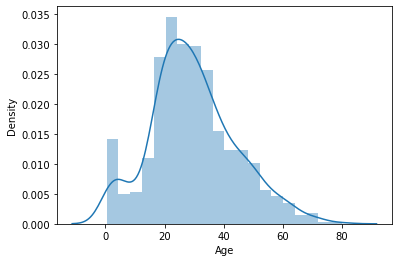

In [26]:
sns.distplot(data['Age'])

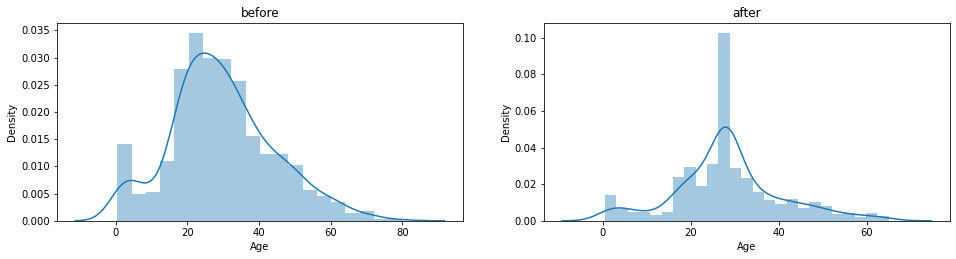

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Age'])
plt.title('before')
plt.subplot(2,2,1)

plt.subplot(2,2,2)
sns.distplot(df1['Age'])
plt.title('after')
plt.subplot(2,2,1)

plt.show()

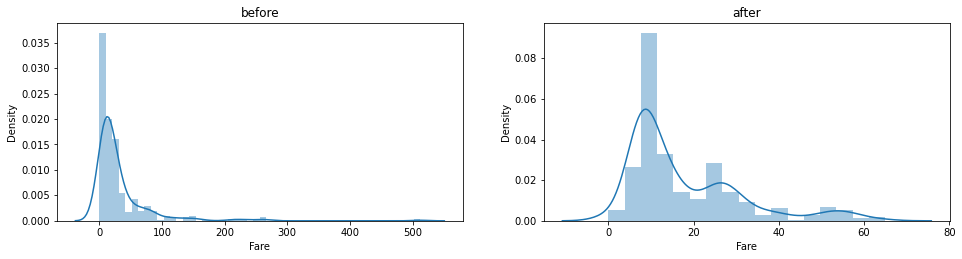

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Fare'])
plt.title('before')
plt.subplot(2,2,1)

plt.subplot(2,2,2)
sns.distplot(df1['Fare'])
plt.title('after')
plt.subplot(2,2,1)

plt.show()

In [29]:
df1.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.25,1,0,1


In [30]:
#splitting data into two parts x and y
x=df1.drop('Survived',axis=1)

y=df1['Survived']

In [31]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x))

x_scaled.head()

,0,1,2,3,4,5,6,7
0,1.0,0.334159,0.2,0.0,0.111538,1.0,0.0,1.0
1,1.0,0.396098,0.0,0.0,0.121923,0.0,0.0,1.0
2,0.0,0.535460,0.2,0.0,0.816923,0.0,0.0,1.0
3,1.0,0.535460,0.0,0.0,0.123846,1.0,0.0,1.0
4,1.0,0.427067,0.0,0.0,0.130128,1.0,1.0,0.0


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

In [33]:
#finding best random state 
maxAccu=0
maxRS=0
for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=accuracy_score(y_test,predx)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is',maxAccu,'on random_state',maxRS)   

best accuracy is 0.875 on random_state 198


In [34]:
#here the random state 198 is given best accuracy 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=198)

In [35]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n==========train results============")
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n=========test reslts===========')
        print(f'accuracy score is:{accuracy_score(y_test,pred)*100:2f}%')
        print('\n')
        print(confusion_matrix(y_test,pred))
        print('\n')
        print(classification_report(y_test,pred))
        scr=cross_val_score(clf,x,y,cv=20)
        print('cross validation score on lgistic regression is ',scr.mean())
        

In [36]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:76.388889%

=========test reslts===========
accuracy score is:87.500000%


[[122  13]
 [ 11  46]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       135
           1       0.78      0.81      0.79        57

    accuracy                           0.88       192
   macro avg       0.85      0.86      0.85       192
weighted avg       0.88      0.88      0.88       192

cross validation score on lgistic regression is  0.7826248313090417


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:80.034722%

=========test reslts===========
accuracy score is:71.875000%


[[105  30]
 [ 24  33]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.80       135
           1       0.52      0.58      0.55        57

    accuracy                           0.72       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.73      0.72      0.72       192

cross validation score on lgistic regression is  0.7087381916329285


In [38]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dcfr=DecisionTreeClassifier()
dcfr.fit(x_train,y_train)
print_score(dcfr,x_train,x_test,y_train,y_test,train=True)
print_score(dcfr,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:98.263889%

=========test reslts===========
accuracy score is:76.562500%


[[106  29]
 [ 16  41]]


              precision    recall  f1-score   support

           0       0.87      0.79      0.82       135
           1       0.59      0.72      0.65        57

    accuracy                           0.77       192
   macro avg       0.73      0.75      0.74       192
weighted avg       0.78      0.77      0.77       192

cross validation score on lgistic regression is  0.7634615384615385


In [39]:
#random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
print_score(rfclf,x_train,x_test,y_train,y_test,train=True)
print_score(rfclf,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:98.263889%

=========test reslts===========
accuracy score is:82.291667%


[[116  19]
 [ 15  42]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       135
           1       0.69      0.74      0.71        57

    accuracy                           0.82       192
   macro avg       0.79      0.80      0.79       192
weighted avg       0.83      0.82      0.82       192

cross validation score on lgistic regression is  0.8154520917678812


In [40]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:69.791667%

=========test reslts===========
accuracy score is:73.437500%


[[124  11]
 [ 40  17]]


              precision    recall  f1-score   support

           0       0.76      0.92      0.83       135
           1       0.61      0.30      0.40        57

    accuracy                           0.73       192
   macro avg       0.68      0.61      0.61       192
weighted avg       0.71      0.73      0.70       192

cross validation score on lgistic regression is  0.700944669365722


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


==========train results============
accuracy score:89.583333%

=========test reslts===========
accuracy score is:86.979167%


[[123  12]
 [ 13  44]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91       135
           1       0.79      0.77      0.78        57

    accuracy                           0.87       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.87      0.87      0.87       192

cross validation score on lgistic regression is  0.8245614035087719


In [42]:
#plotting ROC AUC curve 
from sklearn.metrics import plot_roc_curve,roc_auc_score


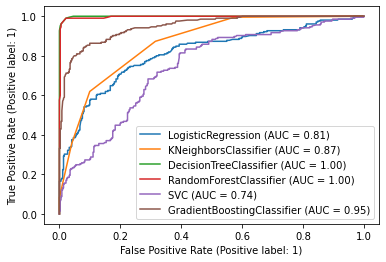

In [43]:
#how wel our model is works on training data 
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dcfr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfclf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gbdt,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

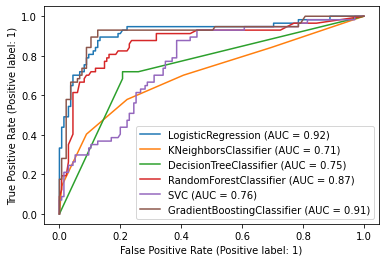

In [44]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dcfr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfclf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

## GradientBoostingClassifier works well comparing to other models


In [45]:
#hyper prameter tunning 
from sklearn.model_selection import GridSearchCV
clf=GradientBoostingClassifier()
params={'criterion': ['friedman_mse', 'squared_error', 'mse'],
            'n_estimators': [7,9],
            'max_depth' :[5,8],
            'learning_rate':[0.01,0.1,1],
            'min_samples_split':[5,10],
            'min_samples_leaf':[5,7]
             }

grd=GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best params==>', grd.best_params_)

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

rf_conf_mat=confusion_matrix(y_test,y_pred)

   

best params==> {'criterion': 'squared_error', 'learning_rate': 1, 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 7}


In [46]:
print('confusion matrix \n',rf_conf_mat)

confusion matrix 
 [[123  12]
 [ 13  44]]


In [47]:
print('accuracy score \n',accuracy_score(y_test,y_pred))
      

accuracy score 
 0.8697916666666666


In [48]:
print(classification_report(y_test,y_pred))      

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       135
           1       0.79      0.77      0.78        57

    accuracy                           0.87       192
   macro avg       0.85      0.84      0.84       192
weighted avg       0.87      0.87      0.87       192



In [49]:
#save the model
import pickle
filename='titanic_train.pkl'
pickle.dump(grd,open(filename,'wb'))